<a href="https://colab.research.google.com/github/MaryamSaharkhan/bigmart_sales_prediction_Regression/blob/master/project_of_bigmart_sales_data01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **project of bigmart sales data**

# Nastaran Zandi
# Maryam Saharkhan

# Data Preprocessing

### Importing the Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importing the Dataset

In [ ]:
dataset = pd.read_csv('bigmart.csv')
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# datatype of attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
dataset.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
dataset.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# replace reapted values in Item_Fat_Content
dataset.replace({'Item_Fat_Content' : {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# removing the ineffective columns
dataset = dataset.drop(columns = ['Item_Identifier' , 'Outlet_Identifier'], axis = 1)

dataset.shape

(8523, 10)

## Missing Values

In [ ]:
dataset.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# filling the object values with mode and float type with mean
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace = True)
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode().iloc[0])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

## Outliers

<Axes: >

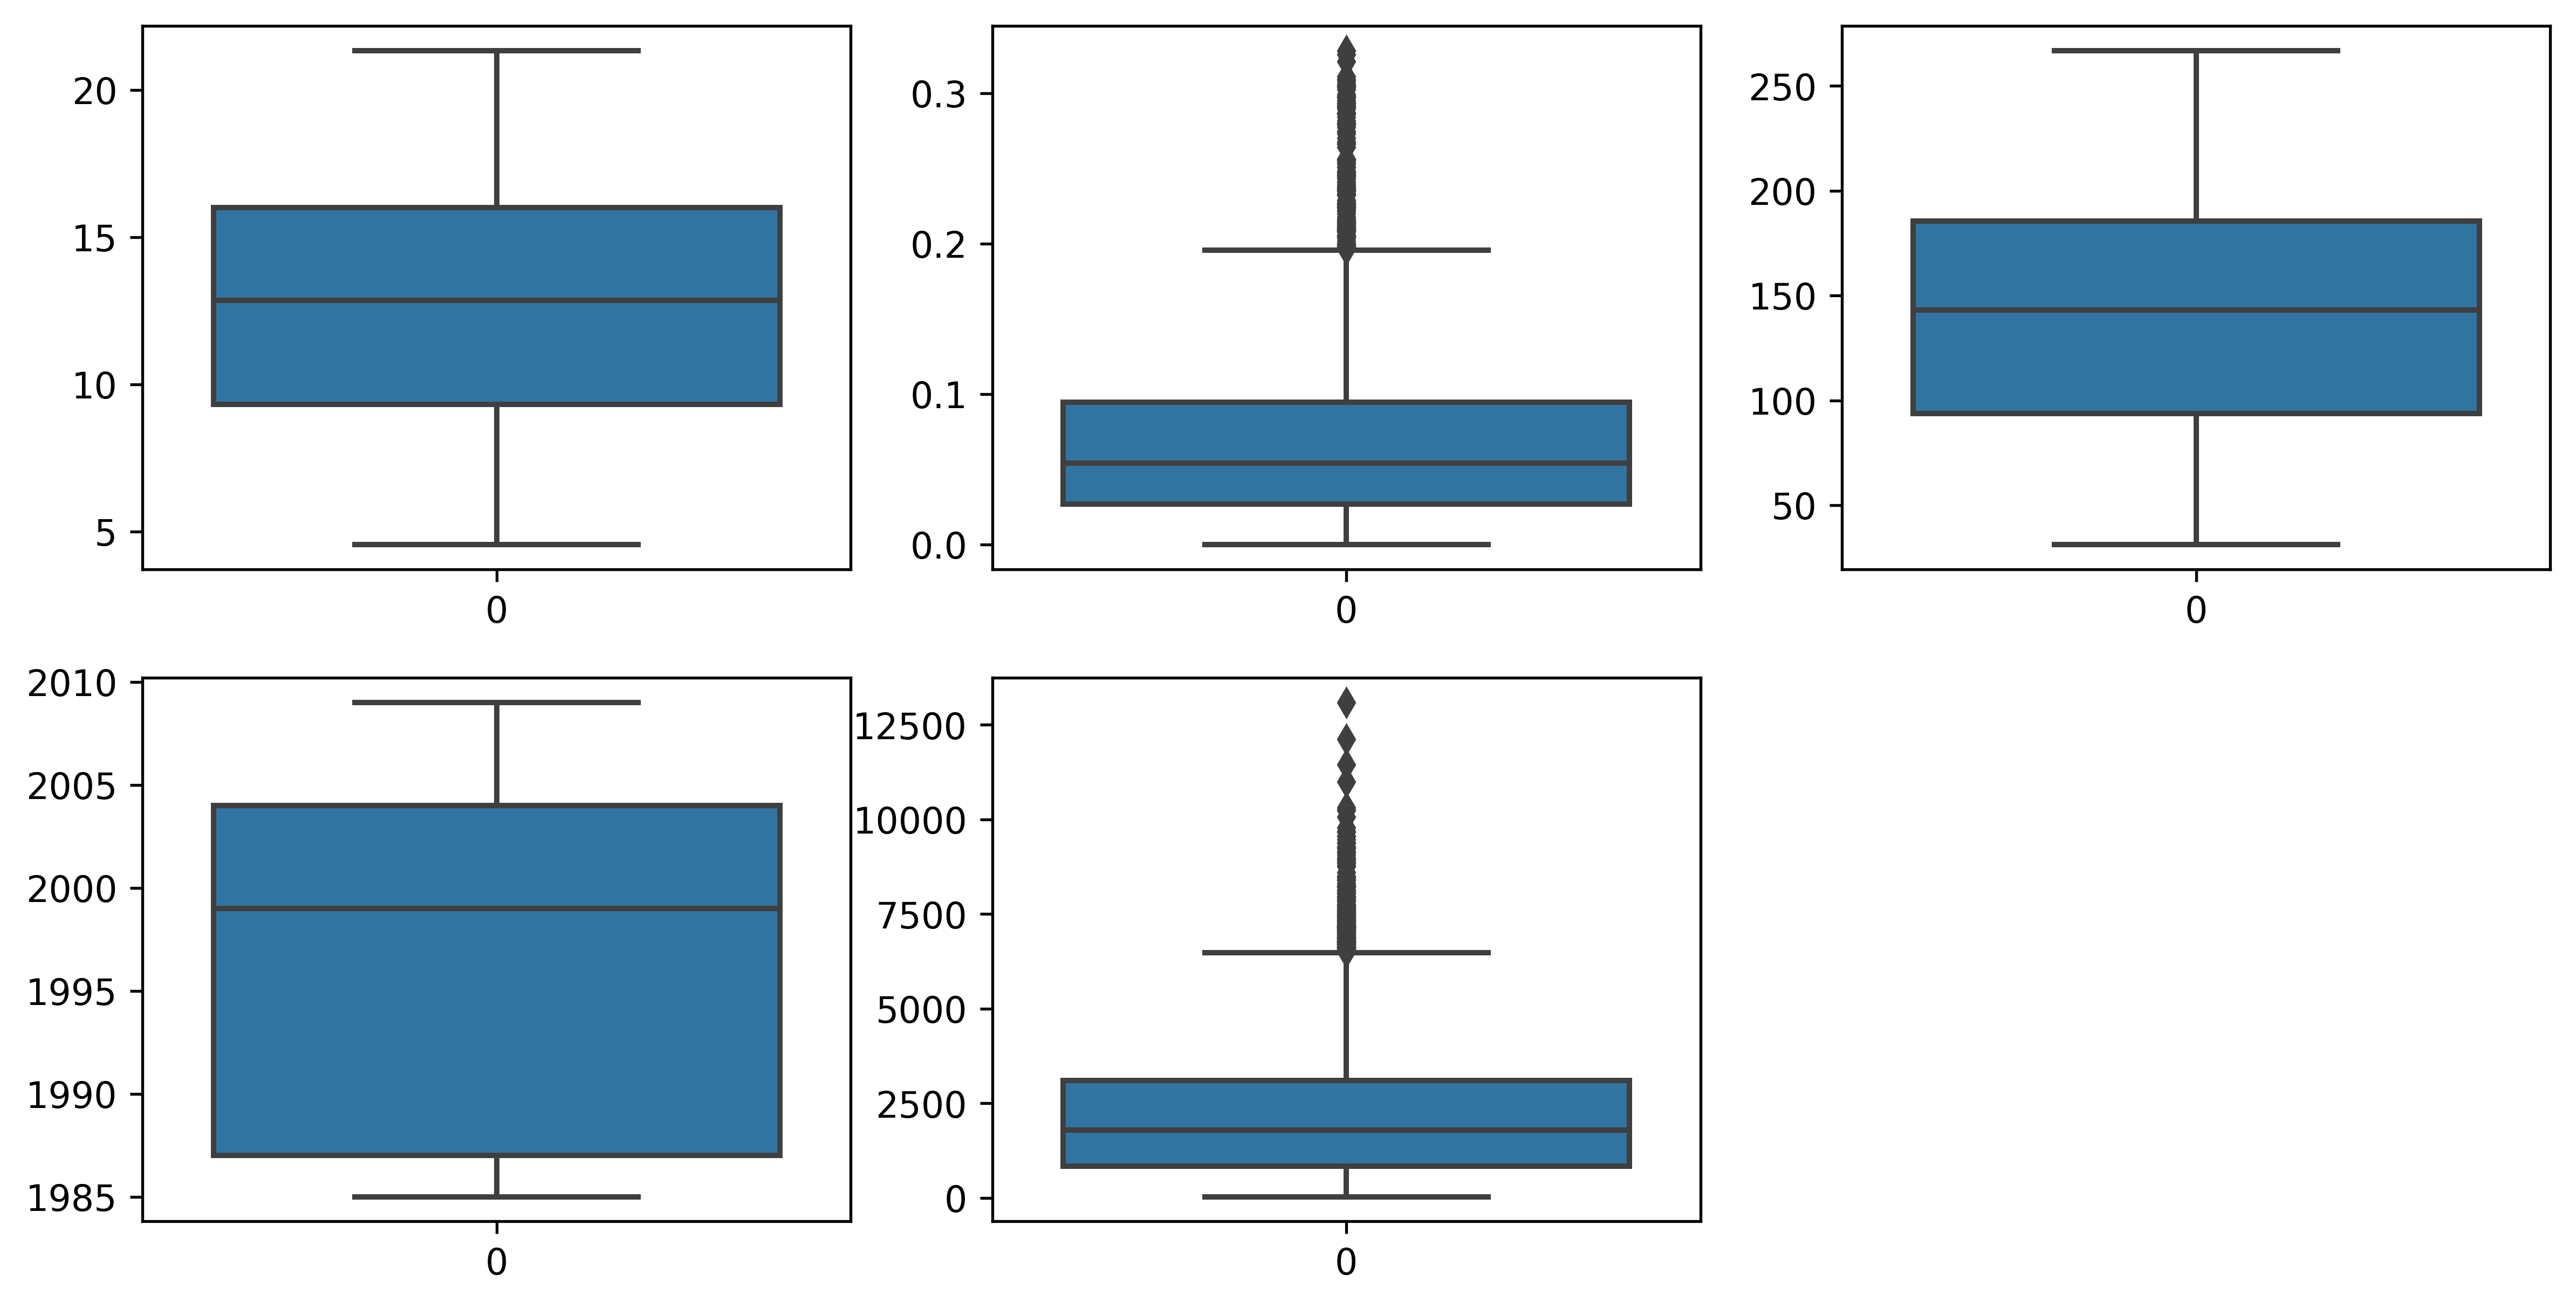

In [ ]:
# detecting for outliers
plt.figure(figsize = (12, 6), dpi = 480)

plt.subplot(2,3,1)
sns.boxplot(dataset['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(dataset['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(dataset['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(dataset['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(dataset['Item_Outlet_Sales'])

Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

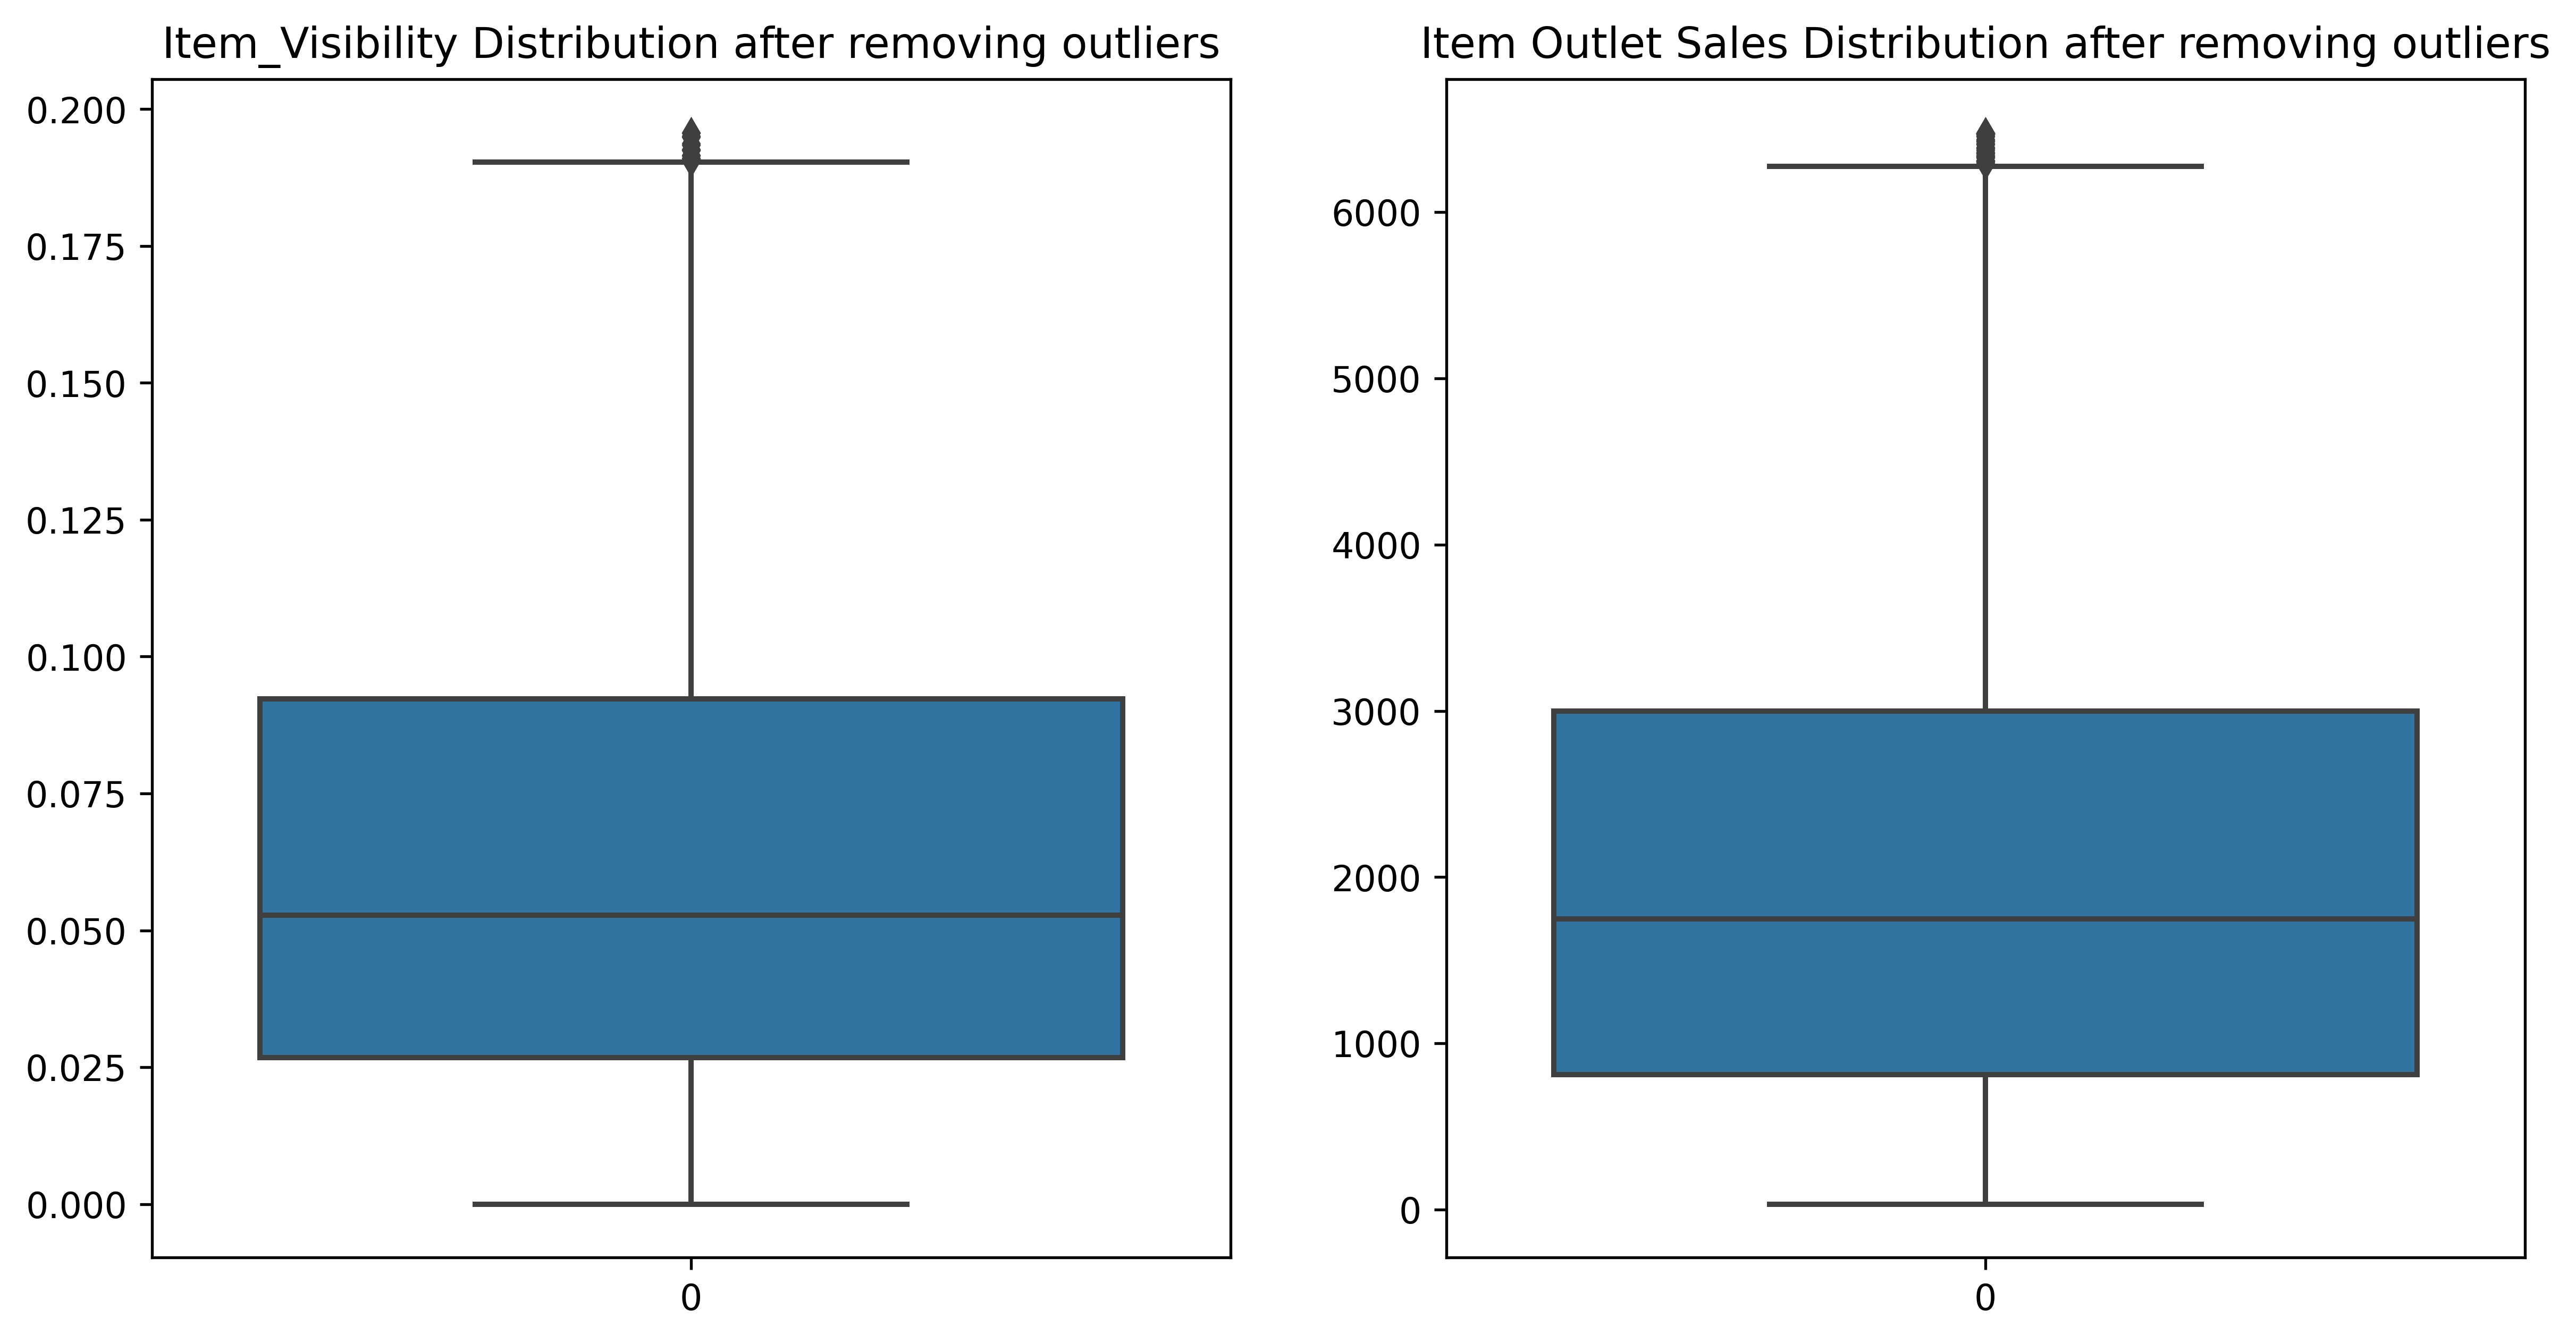

In [ ]:
# removing ouliers
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper_v, lower_v = outliers(dataset, "Item_Visibility")
upper_o, lower_o = outliers(dataset, "Item_Outlet_Sales")

dataset_vis = dataset[(dataset['Item_Visibility'] > lower_v) & (dataset['Item_Visibility'] < upper_v)]
dataset_sal = dataset[(dataset['Item_Outlet_Sales'] > lower_o) & (dataset['Item_Outlet_Sales'] < upper_o)]

plt.figure(figsize = (12, 6), dpi = 480)

plt.subplot(1,2,1)
sns.boxplot(dataset_vis['Item_Visibility'])
plt.title('Item_Visibility Distribution after removing outliers')

plt.subplot(1,2,2)
sns.boxplot(dataset_sal['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

## Encoging categorical data

In [ ]:
cat_col = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Type']
data_encoded = pd.get_dummies(dataset, columns = cat_col)

data_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Normalizing

In [ ]:
# Data inputs
X = data_encoded.drop(['Item_Outlet_Sales'], axis = 1)
copy_x = X

# Data outputs
y = data_encoded['Item_Outlet_Sales']

### Data Spliting

In [ ]:
# splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6818, 32) (1705, 32) (6818,) (1705,)


In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.800211,-0.600703,0.470709,0.136169,-1.344216,1.344216,-0.349985,1.432931,-0.622920,1.623061,...,2.40923,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322
1,1.211317,-0.362159,0.457877,0.493521,0.743928,-0.743928,-0.349985,-0.697870,-0.622920,-0.616120,...,-0.41507,-0.166075,-0.252619,2.857268,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322
2,1.116657,0.194933,-0.482625,-0.102066,-1.344216,1.344216,-0.349985,-0.697870,1.605343,1.623061,...,-0.41507,-0.166075,-0.252619,-0.349985,4.469727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322
3,-1.078275,-0.704944,-1.603553,0.493521,0.743928,-0.743928,-0.349985,-0.697870,-0.622920,-0.616120,...,2.40923,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,-0.407515,-0.234019,-0.138322
4,-0.007432,1.383177,0.218375,-0.102066,0.743928,-0.743928,-0.349985,-0.697870,1.605343,1.623061,...,-0.41507,-0.166075,-0.252619,-0.349985,-0.223727,-0.144262,-0.084203,2.453900,-0.234019,-0.138322


# Feature Selection

<ipython-input-47-739f897ef1a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True, cmap = "crest", linewidths = 0.5, linecolor = 'black')


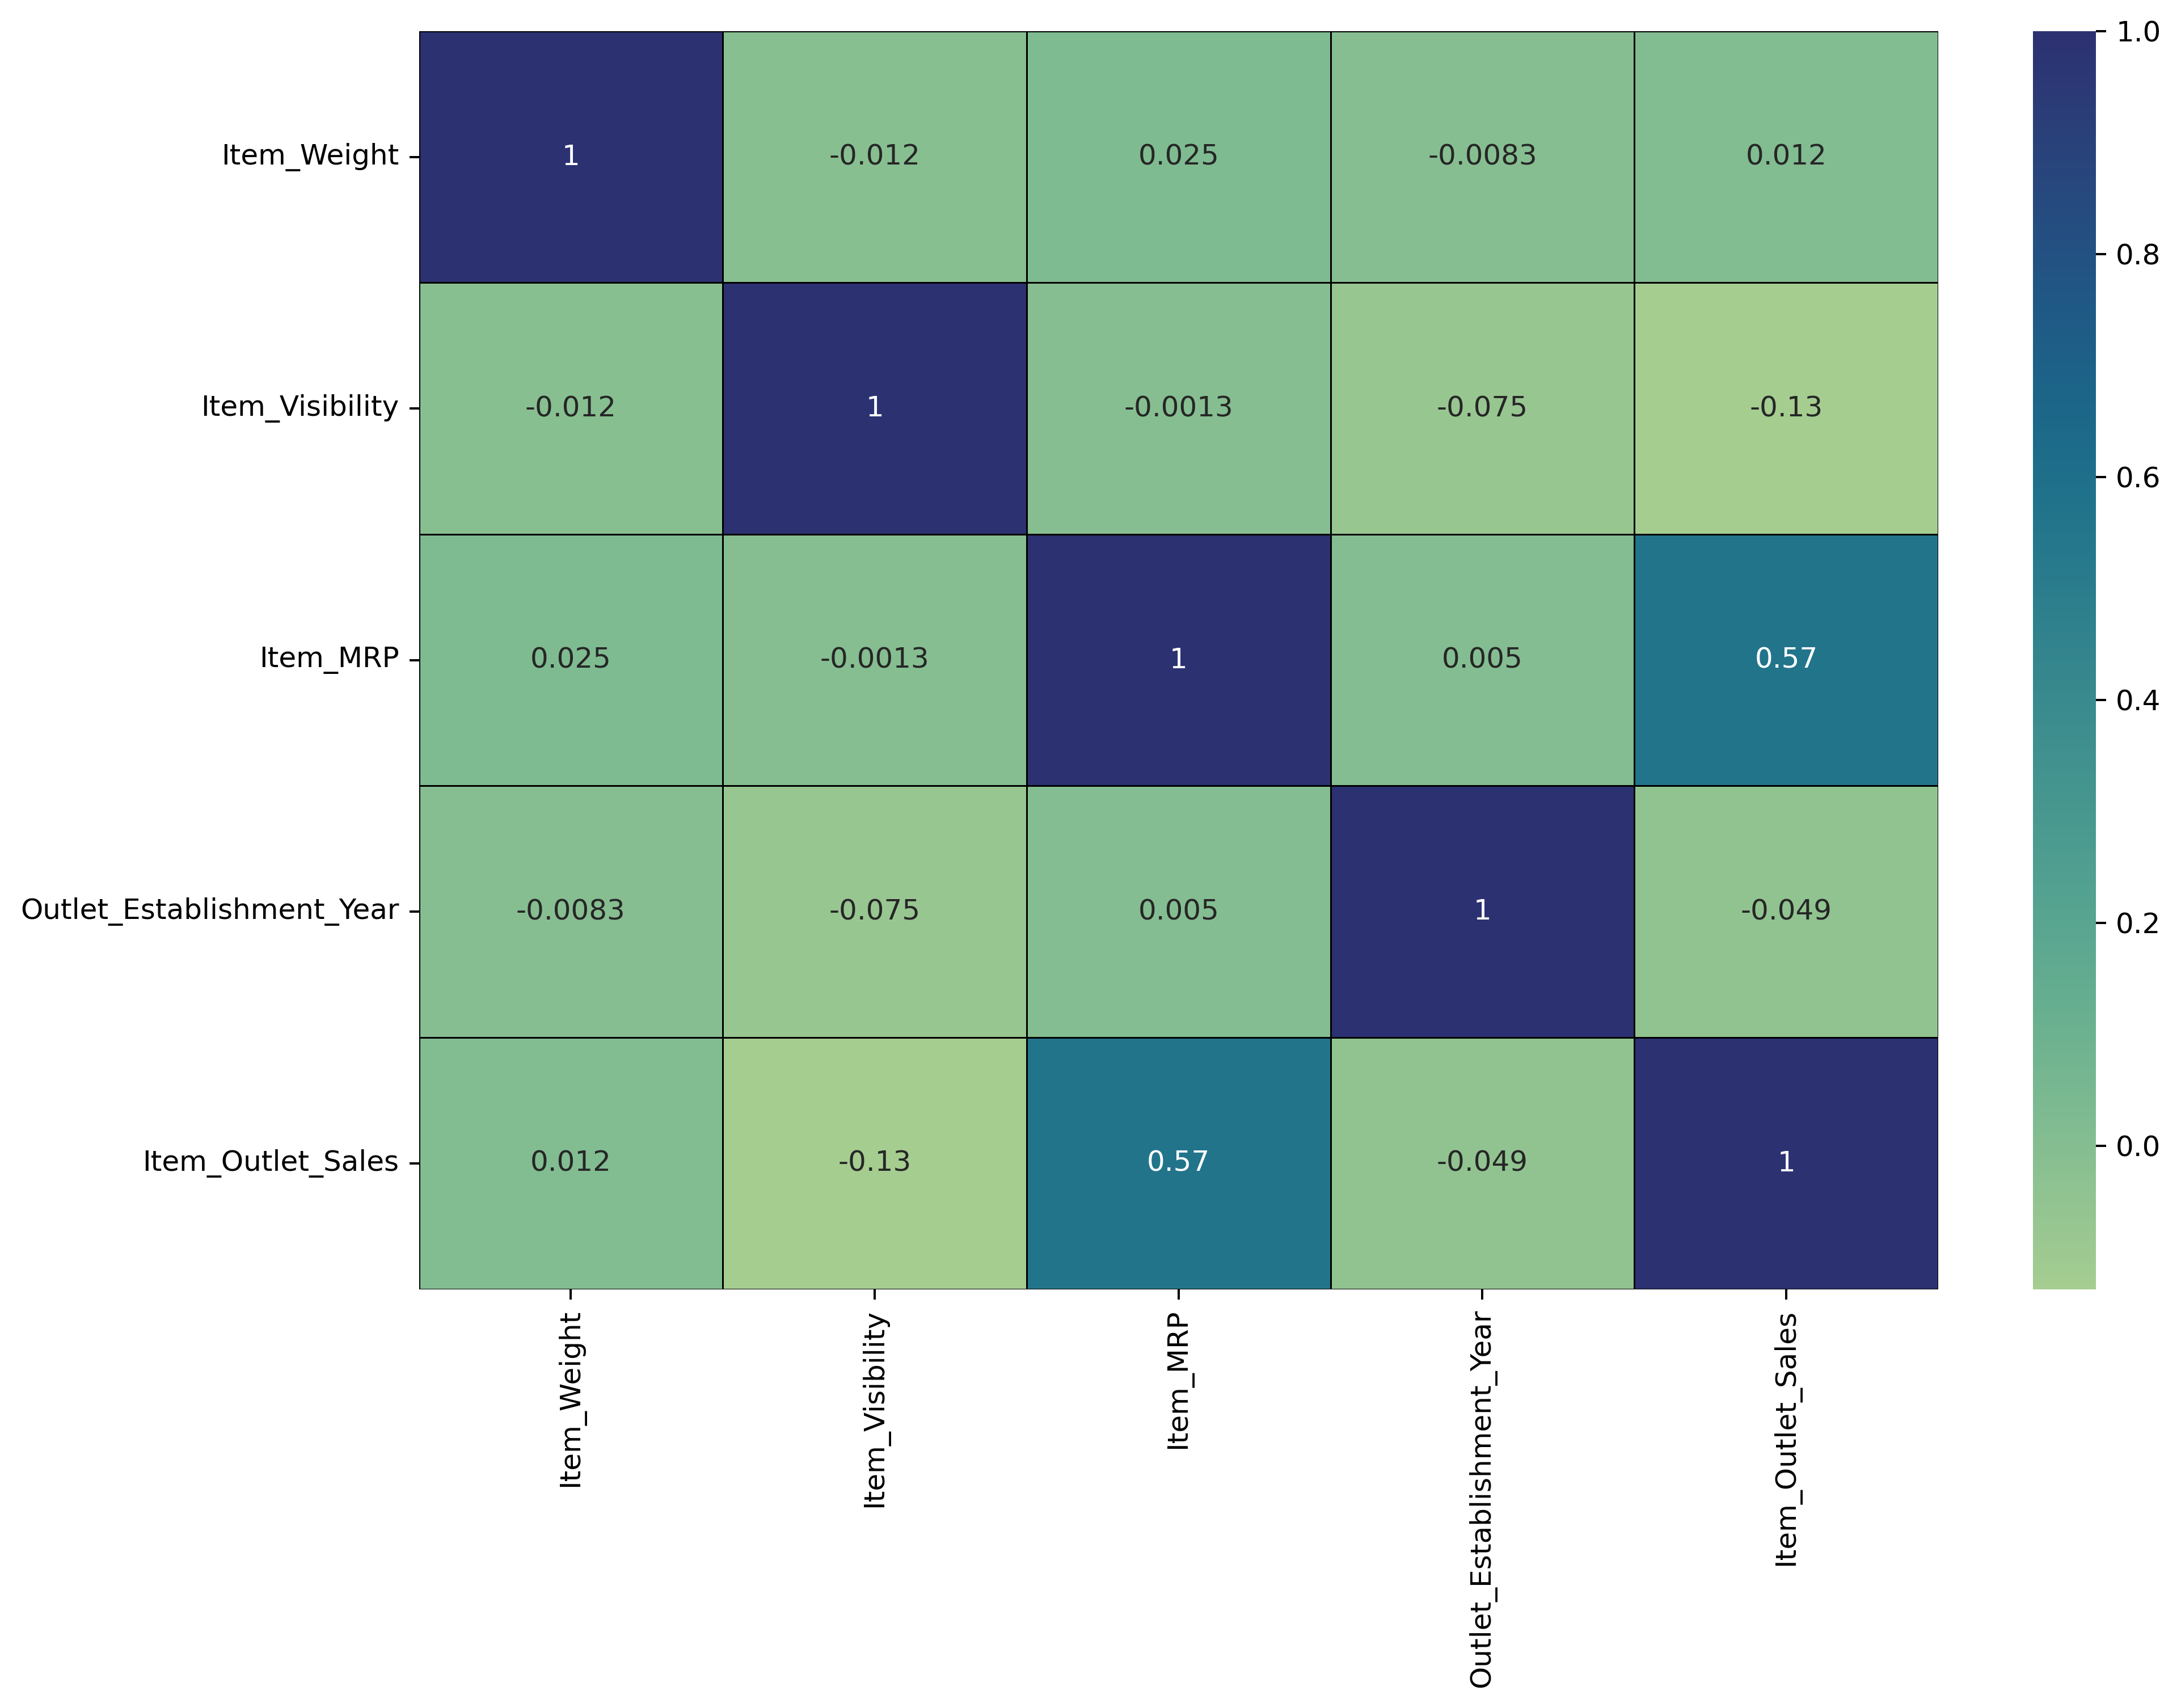

In [ ]:
# Correlation Analysis
plt.figure(figsize = (12, 8), dpi = 360)
sns.heatmap(dataset.corr(), annot = True, cmap = "crest", linewidths = 0.5, linecolor = 'black')
plt.show()

## Features Importanc

 1) Item_Weight                    -65343493978521.828125
 2) Item_Visibility                -62734548803387.585938
 3) Item_MRP                       -59657108220124.304688
 4) Outlet_Establishment_Year      -22965020504986.828125
 5) Item_Fat_Content_Low Fat       -15999560045956.904297
 6) Item_Fat_Content_Regular       -15182590593148.933594
 7) Outlet_Size_High               -15103753505347.107422
 8) Outlet_Size_Medium             -23.888371
 9) Outlet_Size_Small              -7.704561
10) Outlet_Location_Type_Tier 1    61.376753
11) Outlet_Location_Type_Tier 2    97.045045
12) Outlet_Location_Type_Tier 3    220.871572
13) Outlet_Type_Grocery Store      229.064269
14) Outlet_Type_Supermarket Type1  979.463573
15) Outlet_Type_Supermarket Type2  1038093840125.185669
16) Outlet_Type_Supermarket Type3  1385616161647.385498
17) Item_Type_Baking Goods         1685154423332.064453
18) Item_Type_Breads               1748289607729.879150
19) Item_Type_Breakfast            1748289607751.36

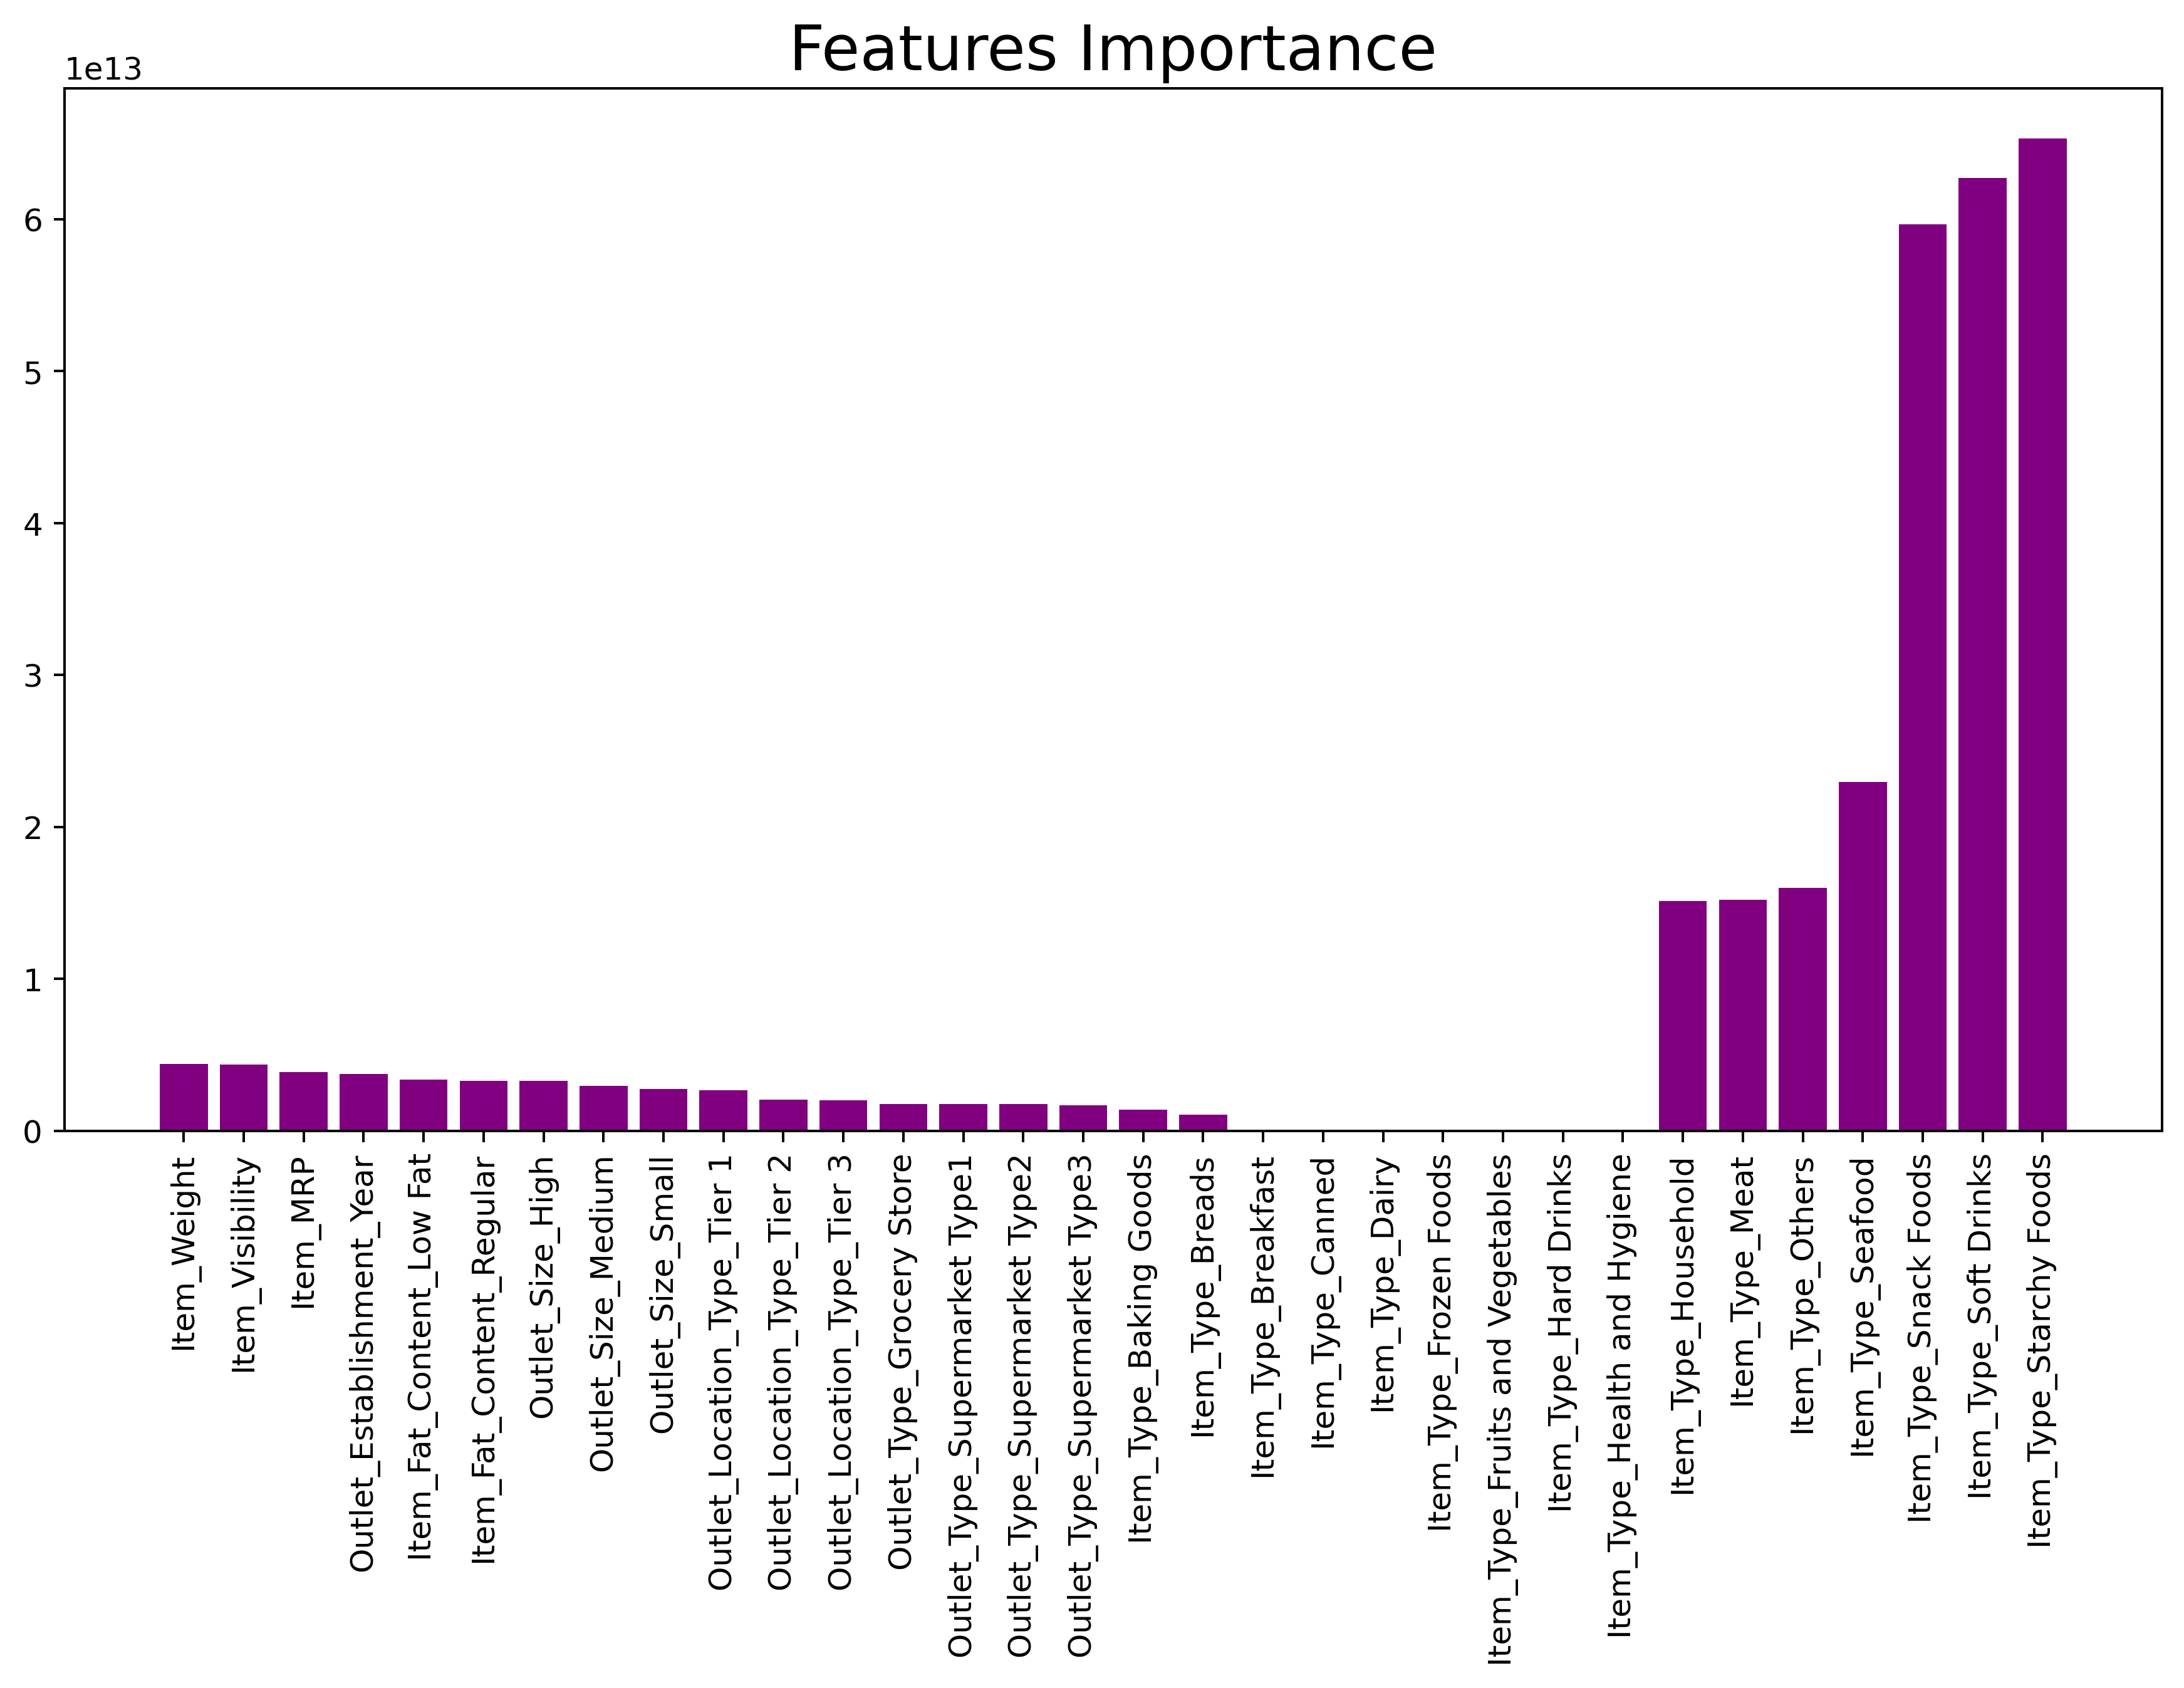

In [ ]:
features_label = X.columns

# create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# access feature importance insights (coefficients)
importances = pd.Series(model.coef_, index = X_train.columns)
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

# sort the coefficients by absolute values to get the most influential features
importances = importances.abs().sort_values(ascending = False)

# visualation of the Features importance
plt.figure(figsize = (12, 6), dpi = 360)
plt.bar(range(X_train.shape[1]), importances[indices], color = "purple", align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90, fontsize = 10)
plt.title('Features Importance', fontsize = 20)
plt.show()

# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

## Linear Regression

In [ ]:
# create and fit the Linear Regression model
lr_model = LinearRegression()

# fitting the model
lr_model.fit(X_train, y_train)

# predict
pred_lr = lr_model.predict(X_test)

# calculate and display regression metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
rscore_lr = r2_score(y_test, pred_lr)

print("r2_score: ", rscore_lr)
print("RMSE: ", rmse_lr)
print("MAE: ", mean_absolute_error(y_test, pred_lr))

r2_score:  0.5792670739935097
RMSE:  1069.3640628549795
MAE:  792.0219059434288


## Random Forest

In [ ]:
# initialize a Random Forest model
rf_model = RandomForestRegressor()

# train the model using the training data
rf_model.fit(X_train, y_train)

# predict the target variable for the test data
pred_rf = rf_model.predict(X_test)

# evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
rscore_rf = r2_score(y_test, pred_rf)

print("r2_score: ", rscore_rf)
print("RMSE: ", rmse_rf)
print("MAE: ", mean_absolute_error(y_test, pred_rf))

r2_score:  0.5621968422257972
RMSE:  1090.8418207515522
MAE:  762.8102894228738


## Decision Tree

In [ ]:
# initialize a Decision Tree model
dt_model = DecisionTreeRegressor(max_depth = 5)

# train the model using the training data
dt_model.fit(X_train, y_train)

# predict the target variable for the test data
pred_dt = dt_model.predict(X_test)

# evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_test, pred_dt))
rscore_dt = r2_score(y_test, pred_dt)

print("r2_score: ", rscore_dt)
print("RMSE: ", rmse_dt)
print("MAE: ", mean_absolute_error(y_test, pred_dt))

r2_score:  0.6113896069457742
RMSE:  1027.7311982700267
MAE:  721.6447426931056


In [ ]:
# comparing all the models
models = pd.DataFrame({'Model' : ['Linear Regression', 'Random Forest', 'Decision Tree'],
                        'R2_Score' : [rscore_lr, rscore_rf, rscore_dt],
                        'RMSE' : [rmse_lr, rmse_rf, rmse_dt]})

models.sort_values(by = 'R2_Score', ascending = False)

,Model,R2_Score,RMSE
2,Decision Tree,0.611390,1027.731198
0,Linear Regression,0.579267,1069.364063
1,Random Forest,0.562197,1090.841821


# Cross Validation


### Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a cross-validation object with desired number of folds
num_folds = 5
cross_validation = KFold(n_splits = num_folds, shuffle = True)

# Perform cross-validation
cross_val_scores = cross_val_score(lr_model, X, y, cv = cross_validation, scoring = 'r2')

# Print the cross-validation scores
print("Cross-Validation Scores_LR: ", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean of Cross-Validation Scores: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())

Cross-Validation Scores_LR:  [0.5663878  0.5221037  0.56101768 0.56888087 0.57881374]
Mean of Cross-Validation Scores:  0.5594407573404226
Standard Deviation of Cross-Validation Scores:  0.01954089241191282


### Random Forest

In [ ]:
# Create a cross-validation object with desired number of folds
cross_validation = KFold(n_splits = 5, shuffle = True)

# Perform cross-validation
cross_val_scores = cross_val_score(rf_model, X, y, cv = cross_validation, scoring = 'r2')

# Print the cross-validation scores
print("Cross-Validation Scores_RF: ", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean of Cross-Validation Scores: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())

Cross-Validation Scores_RF:  [0.55318058 0.52399105 0.5792898  0.5312632  0.56436859]
Mean of Cross-Validation Scores:  0.5504186422887678
Standard Deviation of Cross-Validation Scores:  0.02049937350171561


### Decision Tree

In [ ]:
# Create a cross-validation object with desired number of folds
cross_validation = KFold(n_splits = 5, shuffle = True)

# Perform cross-validation
cross_val_scores = cross_val_score(dt_model, X, y, cv = cross_validation, scoring = 'r2')

# Print the cross-validation scores
print("Cross-Validation Scores_DT: ", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean of Cross-Validation Scores: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())

Cross-Validation Scores_DT:  [0.58729022 0.60082194 0.57120398 0.59260012 0.6047253 ]
Mean of Cross-Validation Scores:  0.5913283095474233
Standard Deviation of Cross-Validation Scores:  0.01176877800234387
